# IMPLEMENTING LogisticRegression CLASSIFIER ALGORITHM

In [1]:
#import library packages
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load given dataset
data = pd.read_csv("data.csv")

In [4]:
df = data.dropna()

In [5]:
del df['S.No']

In [6]:
df.columns

Index(['Crime', 'Gender', 'Age', 'Income', 'Job', 'Maritalstatus', 'Education',
       'Harm', 'Attack', 'AttackMethod'],
      dtype='object')

In [7]:
df.head()

,Crime,Gender,Age,Income,Job,Maritalstatus,Education,Harm,Attack,AttackMethod
0,Misuse of Debit Cards or Credit Cards,Male,Between 38 and 50,Middle,Technical,Married,Primary Education,Fraud,Hacking Social Media Accounts,Creating a Fake Shopping Site
1,Misuse of Debit Cards or Credit Cards,Female,27 and Under,Low,Student,Single,High School,Internet Shopping Out of Knowledge,Hacking Social Media Accounts,Social Engineering
2,Misuse of Debit Cards or Credit Cards,Male,Between 38 and 50,Low,Retired,Married,Primary Education,Internet Shopping Out of Knowledge,Hacking Social Media Accounts,Social Engineering
3,Misuse of Debit Cards or Credit Cards,Male,Between 38 and 50,Low,Technical,Married,High School,Internet Shopping by Intoducing Himself as a B...,Hacking Social Media Accounts,Social Engineering
4,Misuse of Debit Cards or Credit Cards,Male,Between 38 and 50,Low,Others,Married,High School,Internet Shopping Out of Knowledge,Hacking Social Media Accounts,Social Engineering


In [8]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Crime', 'Gender', 'Age', 'Income', 'Job', 'Maritalstatus', 'Education', 'Harm', 'Attack']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)

In [9]:
df.head()

,Crime,Gender,Age,Income,Job,Maritalstatus,Education,Harm,Attack,AttackMethod
0,1,1,3,2,9,0,2,1,1,Creating a Fake Shopping Site
1,1,0,0,1,8,1,1,2,1,Social Engineering
2,1,1,3,1,7,0,2,2,1,Social Engineering
3,1,1,3,1,9,0,1,3,1,Social Engineering
4,1,1,3,1,6,0,1,2,1,Social Engineering


In [10]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='AttackMethod', axis=1)
#Response variable
y = df.loc[:,'AttackMethod']  

In [11]:
#Splitting for train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))

Number of training dataset:  1261
Number of test dataset:  541
Total number of dataset:  1802


##### Implementing LogisticRegression Algo

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_confusion_matrix

Training

In [13]:
svc = LogisticRegression()
svc.fit(X_train,y_train)
predicted = svc.predict(X_test)

Finding Accuracy

In [14]:
accuracy = accuracy_score(y_test,predicted)
print('Accuracy of LogisticRegression',accuracy*100)

Accuracy of LogisticRegression 74.12199630314234


Finding Clasiification Report

In [15]:
cr = classification_report(y_test,predicted)
print('Classification report\n\n',cr)

Classification report

                                        precision    recall  f1-score   support

    Card Copying / Generating Devices       0.00      0.00      0.00        40
        Creating a Fake Shopping Site       0.40      0.20      0.27        84
             Hacking Tools or Malware       0.00      0.00      0.00        33
                      Phishing Attack       0.80      1.00      0.89        28
Receiving Public Data on Social Media       1.00      1.00      1.00        67
                   Social Engineering       0.75      1.00      0.86       289

                             accuracy                           0.74       541
                            macro avg       0.49      0.53      0.50       541
                         weighted avg       0.63      0.74      0.67       541



Finding Confusion matrix

In [16]:
cm = confusion_matrix(y_test,predicted)
print('Confusion matrix\n\n',cm)

Confusion matrix

 [[  0   1   0   4   0  35]
 [  4  17   5   3   0  55]
 [  0  25   0   0   0   8]
 [  0   0   0  28   0   0]
 [  0   0   0   0  67   0]
 [  0   0   0   0   0 289]]


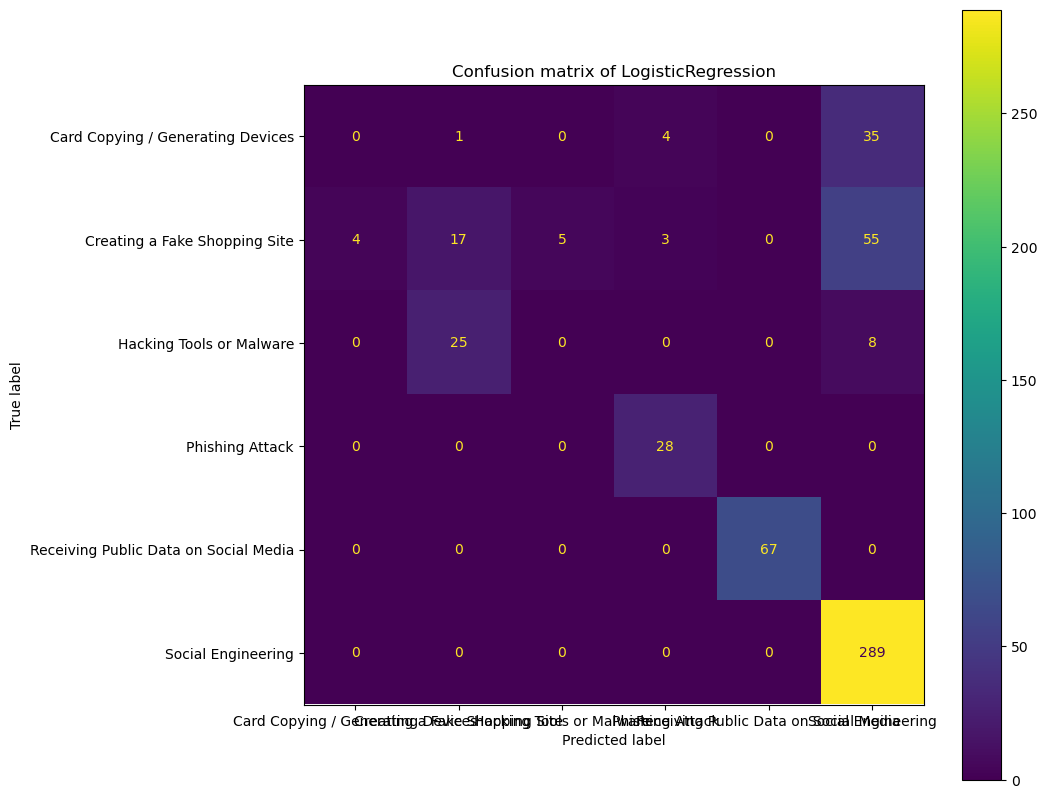

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(svc, X_test, y_test, ax=ax)
plt.title('Confusion matrix of LogisticRegression')
plt.show()

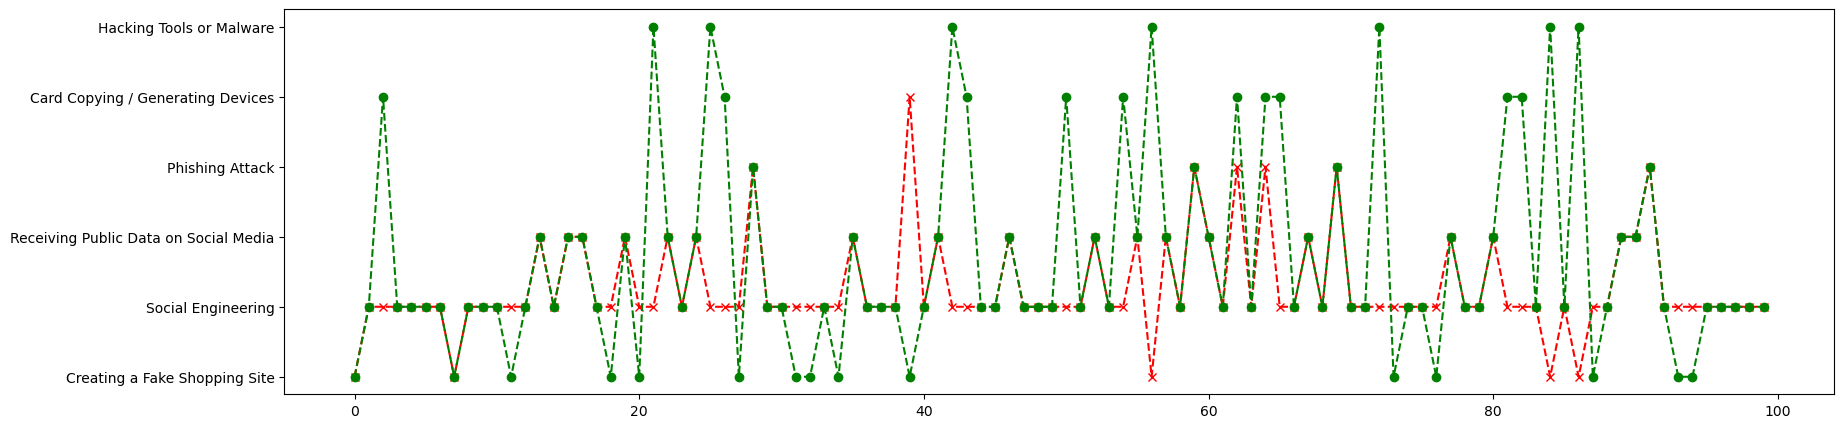

In [18]:
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()